```Date 02/05/23```
<p>Name:- Krishna Mundada<p>
<p>Roll No:- 45 </p>
<p>Batch:- E3</p>
<p>Practical 7</p>
<p>Topic:- MNIST Digit Recognition  </p>
<hr>
<hr>

Write a program to implement feed forward neural network, Alexnet, Lnet and VGG16 on mnist dataset compare result in terms of time and Accuracy, split=80 and 20

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vedantpadole","key":"3841cb3f65c269a9264a4ac06efb6c3f"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                          Spotify and Youtube                                   9MB  2023-03-20 15:43:25           9353        337  1.0              
arnabchaki/data-science-salaries-2023                          Data Science Salaries 2023  💸                        25KB  2023-04-13 09:55:16           2780         72  1.0              
erdemtaha/cancer-data                                          Cancer Data                                          49KB  2023-03-22 07:57:00           4345         98  1.0              
evangower/premier-league-2022-2023                             Pr

In [ ]:
!kaggle datasets download -d animatronbot/mnist-digit-recognizer

 87% 8.00M/9.16M [00:01<00:00, 12.6MB/s]
100% 9.16M/9.16M [00:01<00:00, 8.61MB/s]


In [ ]:
!unzip /content/mnist-digit-recognizer.zip

Archive:  /content/mnist-digit-recognizer.zip
  inflating: train.csv               


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop('label',axis=1)
y = df['label']
X.shape

(42000, 784)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

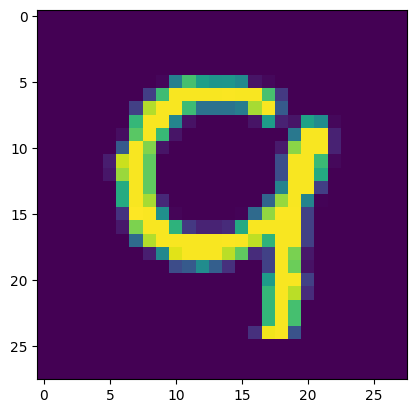

In [ ]:
import numpy as np
plt.imshow(np.array(x_train.iloc[1]).reshape(28,28))

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
input_size = 784
encoding_dim = 32

input_img = keras.Input(shape=(input_size,))
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = keras.layers.Dense(input_size, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
loss, accuracy = autoencoder.evaluate(x_test, x_test)
print("The loss is : ",loss)
print("The accuracy is: ",accuracy)


Epoch 1/10
235/235 [==============================] - 5s 17ms/step - loss: 0.2744 - accuracy: 0.0144 - val_loss: 0.1869 - val_accuracy: 0.0140
Epoch 2/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1690 - accuracy: 0.0119 - val_loss: 0.1522 - val_accuracy: 0.0113
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1438 - accuracy: 0.0115 - val_loss: 0.1333 - val_accuracy: 0.0098
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1282 - accuracy: 0.0109 - val_loss: 0.1206 - val_accuracy: 0.0097
Epoch 5/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1178 - accuracy: 0.0107 - val_loss: 0.1123 - val_accuracy: 0.0105
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1109 - accuracy: 0.0109 - val_loss: 0.1066 - val_accuracy: 0.0133
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1058 - accuracy: 0.0112 - val_loss: 0.1025 - val_accuracy: 0.0154

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
decoded_imgs

array([[7.8738296e-09, 7.4654638e-09, 7.7409270e-09, ..., 7.3403497e-09,
        2.7544009e-09, 1.3647015e-08],
       [1.0379384e-09, 8.2345366e-08, 1.2986355e-08, ..., 1.1101036e-09,
        1.3471355e-09, 4.2482928e-09],
       [3.1553395e-06, 7.9852807e-06, 8.6544951e-06, ..., 7.9739193e-06,
        4.6467276e-06, 4.5928764e-06],
       ...,
       [3.1120972e-13, 4.9353761e-13, 3.9814050e-13, ..., 1.4934057e-13,
        2.5434326e-13, 1.0919302e-13],
       [4.7266363e-10, 5.0536669e-10, 1.7544977e-09, ..., 1.3492170e-11,
        7.6990567e-11, 7.9319142e-11],
       [4.3974872e-15, 4.5305372e-13, 5.8339665e-14, ..., 5.7260046e-15,
        1.4299443e-15, 1.4965100e-14]], dtype=float32)

Alexnet

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten,Input,MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

In [ ]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
model=Sequential()
model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"))
# model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 5, 5, 96)          11712     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 256)         614656    
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 384)         1327488   
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 256)         884992    
                                                        

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 36s 11ms/step - loss: 0.4395 - accuracy: 0.8518 - val_loss: 0.1389 - val_accuracy: 0.9654
Epoch 2/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1455 - accuracy: 0.9639 - val_loss: 0.1255 - val_accuracy: 0.9691
Epoch 3/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1115 - accuracy: 0.9720 - val_loss: 0.1413 - val_accuracy: 0.9657
Epoch 4/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0929 - accuracy: 0.9760 - val_loss: 0.0858 - val_accuracy: 0.9781
Epoch 5/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0772 - accuracy: 0.9796 - val_loss: 0.0923 - val_accuracy: 0.9720
Epoch 6/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0715 - accuracy: 0.9809 - val_loss: 0.0622 - val_accuracy: 0.9817
Epoch 7/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0659 - accuracy: 0.9822 - val_loss: 0.0738 -

Lnet

In [ ]:
model1 = Sequential()
model1.add(Conv2D(8, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model1.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model1.add(Flatten())
model1.add(Dense(120, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 16)          3216      
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 32)          12832     
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 120)               61560     
                                                      

In [ ]:
model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1839 - accuracy: 0.9430 - val_loss: 0.0805 - val_accuracy: 0.9740
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0643 - accuracy: 0.9800 - val_loss: 0.0437 - val_accuracy: 0.9866
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.0339 - val_accuracy: 0.9882
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0358 - val_accuracy: 0.9882
Epoch 5/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0308 - accuracy: 0.9902 - val_loss: 0.0322 - val_accuracy: 0.9896
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0369 - val_accuracy: 0.9883
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0468 - val_accuracy:

VGG-16

In [ ]:
from skimage.transform import resize
num_samples, img_height, img_width = x_train.shape
new_img_height, new_img_width = 224, 224
x_train = x_train.reshape(num_samples, img_height, img_width, 1)
x_train_resized = np.zeros((num_samples, new_img_height, new_img_width, 1))
for i in range(num_samples):
    x_train_resized[i] = resize(x_train[i], (new_img_height, new_img_width))
x_train_resized = x_train_resized.reshape(num_samples, new_img_height, new_img_width)


In [ ]:
model2=Sequential()
model2.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model2.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
model2.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
# model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
# model2.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
# model2.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
# model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Conv2D(512, kernel_size=(5, 5), activation='relu'))
# model2.add(Conv2D(512, kernel_size=(5, 5), activation='relu'))
# model2.add(Conv2D(512, kernel_size=(5, 5), activation='relu'))
# model2.add(Conv2D(512, kernel_size=(5, 5), activation='relu'))
# model2.add(Conv2D(512, kernel_size=(5, 5), activation='relu'))
# model2.add(Conv2D(512, kernel_size=(5, 5), activation='relu'))
# model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(4096,activation='relu'))
model2.add(Dense(4096,activation='relu'))
model2.add(Dense(10,activation='softmax'))

In [ ]:
model2.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 24, 24, 64)        1664      
                                                                 
 conv2d_19 (Conv2D)          (None, 20, 20, 64)        102464    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 6, 6, 128)         204928    
                                                                 
 conv2d_21 (Conv2D)          (None, 2, 2, 128)         409728    
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                      

In [ ]:
model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 27s 10ms/step - loss: 0.1588 - accuracy: 0.9538 - val_loss: 0.0849 - val_accuracy: 0.9775
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0668 - accuracy: 0.9834 - val_loss: 0.0572 - val_accuracy: 0.9854
Epoch 3/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0534 - accuracy: 0.9870 - val_loss: 0.0377 - val_accuracy: 0.9923
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0424 - accuracy: 0.9900 - val_loss: 0.0877 - val_accuracy: 0.9818
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0368 - accuracy: 0.9905 - val_loss: 0.0464 - val_accuracy: 0.9890
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0342 - accuracy: 0.9918 - val_loss: 0.0378 - val_accuracy: 0.9927
Epoch 7/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0306 - accuracy: 0.9926 - val_loss: 0.0606 -